#### 【 지도학습 - 선형모델: 다항회귀 】

- 선형회귀 알고리즘을 기반으로 과대적합이 되지 않으며 실제값과 예측값 차이를 최소로 하는 선형식을 찾는 방법
- 기존 피쳐들을 변형해서 직성 => 곡선의 다항식 도출
- 문제점 : 과대적합(Overfitting) 주의 필요 !!
- 선형식 : y = W0 + W1*X1 + .... + Wn*Xn

#### 【 지도학습 - 선형 모델 : 다항회귀 】

- 주__제 : 농어의 길이에 따른 무게 예측 모델 구현
- 데이터 : ../Data/fish.csv
- 종__류 : 지도학습 - 수치값 예측 즉, 회귀
- 방__법 : 선형모델을 기반으로 구현 => LinearRegression

[1] 모듈 로딩 및 데이터 준비 <hr>

In [141]:
## [1-1] 모듈 로딩
## 기본 모듈
import numpy as np
import pandas as pd

## 시각화
import matplotlib.pyplot as plt
import koreanize_matplotlib

## ML 전처리 관련
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

## ML 학습 알고리즘 관련
from sklearn.linear_model import LinearRegression

## ML 성능평가 관련
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error


In [142]:
## ================================================================= 
## [1-2] 데이터 준비 : 74행 ~ 129행 , Weight, Lenght
## =================================================================
## 데이터 파일 및 추출
fishDF = pd.read_csv('../DATA/fish.csv',skiprows=73, nrows=56, usecols=[1, 2], header=None)
print(fishDF.shape, fishDF.ndim)
fishDF


(56, 2) 2


,1,2
0,5.9,8.4
1,32.0,13.7
2,40.0,15.0
3,51.5,16.2
4,70.0,17.4
5,100.0,18.0
6,78.0,18.7
7,80.0,19.0
8,85.0,19.6
9,85.0,20.0


실습 데이터 준비

In [143]:
## [1-2]  데이터
featureNP = np.arange(4).reshape(2,2)
targetNP = 1 + 2*featureNP[:,0] + 3*featureNP[:,0]**2 + 4*featureNP[:,1]**3

print(featureNP.shape, featureNP.ndim)
print(targetNP)

(2, 2) 2
[  5 125]


[2] 데이터 전처리 <hr>

In [144]:
## [2-1] 피쳐와 타겟 분리
featureDF = fishDF[fishDF.columns[1:2]] ## 2차원으로 만들어야함
targetSR = fishDF[fishDF.columns[0]]

print(f'featureDF : {featureDF.shape}, targetSR : {targetSR.shape}')

featureDF : (56, 1), targetSR : (56,)


In [145]:
## [2-2] 학습용/테스트용 데이터셋 분리
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR,
                                                    test_size=0.2,
                                                    random_state=10)

print(f'[Train] x_train : {x_train.shape}, y_train : {y_train.shape}')
print(f'[Test] x_test : {x_test.shape}, y_test : {y_test.shape}')

[Train] x_train : (44, 1), y_train : (44,)
[Test] x_test : (12, 1), y_test : (12,)


In [146]:
# ## [2-3] DT계열에 제외한 선형모델, 거리기반 모델 등은 피쳐 스케일링 진행
# ##       => 피쳐 1개로 스케일링 X
# stModel = StandardScaler()
# x_train = stModel.fit_transform(x_train)
# x_test = stModel.transform(x_test)

[3] 학습 진행 + 성능평가 <hr>

In [147]:
## =============================================================
## [3-1] 일반 선형 모델
## =============================================================
lrModel = LinearRegression()
lrModel.fit(x_train, y_train)

## -> 해당 데이터셋의 규칙/패턴 수식화 : 선형식
print(f'가중치 : {lrModel.coef_}, 절편 : {lrModel.intercept_}')

## =============================================================
## [3-2] 일반 선형 모델 평가 진행
## =============================================================
train_score = lrModel.score(x_train, y_train)
test_score = lrModel.score(x_test, y_test)

print(f'[Train] : {train_score}\n [Test] : {test_score}')

가중치 : [37.07726677], 절편 : -645.253011298425
[Train] : 0.9240032680854626
 [Test] : 0.8386116153753963


[-496.94394424  467.06499165 1023.22399313]


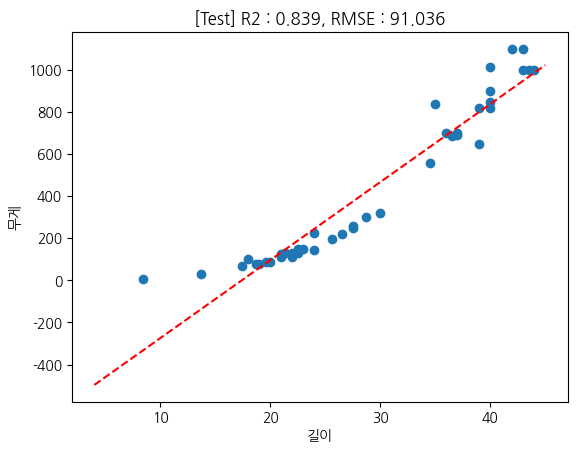

In [148]:
## =============================================================
## [3-3] 일반 선형 모델 시각화
## =============================================================
## => 선형식 데이터
new_data = [[4],[30],[45]]
newDF = pd.DataFrame(new_data, columns=fishDF.columns[1:2])
preSR = lrModel.predict(newDF)
print(preSR)

## => 회귀 모델 성능지표
pre_weights = lrModel.predict(x_test)
r2_ = r2_score(y_test, pre_weights)
rmse_ = root_mean_squared_error(y_test, pre_weights)

## -> 시각화
plt.plot(x_train, y_train, 'o')
plt.plot(new_data, preSR, 'r--') ## 예측한 값으로 선을 긋는것
plt.xlabel('길이')
plt.ylabel('무게')
# plt.title('길이와 무게의 관계 시각화')
plt.title(f'[Test] R2 : {r2_:.3f}, RMSE : {rmse_:.3f}')
plt.show()

[4] 피쳐 생성 + 학습 진행 + 성능평가 <hr>

In [149]:
## [4-0] 피쳐 스케일링
stdScaler = StandardScaler()
scaled_x_train = stdScaler.fit_transform(x_train)
scaled_x_test = stdScaler.transform(x_test)

In [150]:
## [4-1] 피쳐 생성 : 긷존 피쳐 조합, 제곱항으로 피쳐 생성
poly = PolynomialFeatures(degree=2) ## 기본값
poly_x_train = poly.fit_transform(scaled_x_train)

print(f' [피쳐 개수] scaled_x_train : {scaled_x_train.shape} ===> poly_x_train : {poly_x_train.shape}')

 [피쳐 개수] scaled_x_train : (44, 1) ===> poly_x_train : (44, 3)


In [151]:
## [4-2] 학습 진행
plrModel = LinearRegression()
plrModel.fit(poly_x_train, y_train)

## ==> 해당 데이터셋의 규칙/패턴 수식화 : 선형식
print(f'가중치 : {plrModel.coef_}, 절편 : {plrModel.intercept_}')

가중치 : [  0.         337.36399877  87.48972193], 절편 : 327.66709625170995


In [152]:
## =============================================================
## [4-3] 다항 회귀 선형 모델 평가 진행
## =============================================================
poly_x_test = poly.transform(scaled_x_test)

train_score = plrModel.score(poly_x_train, y_train)
test_score = plrModel.score(poly_x_test, y_test)

print(f'[Train] : {train_score}\n [Test] : {test_score}')

[Train] : 0.971115050581039
 [Test] : 0.9759141253594011


(39, 1)
0.9759141253594011, 35.168839263730646


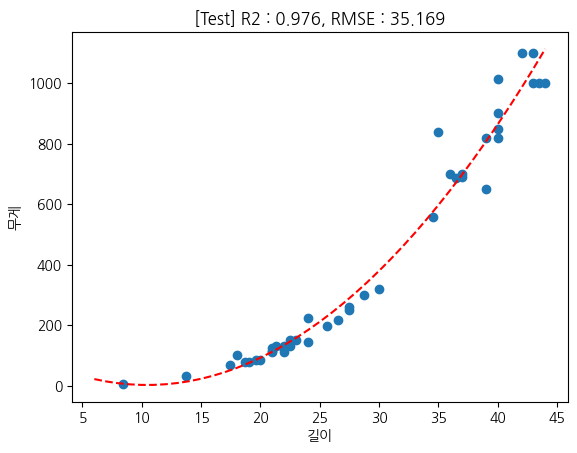

In [153]:
## =============================================================
## [4-4] 일반 선형 모델 시각화
## =============================================================
## => 선형식 데이터
new_data = np.arange(6, 45).reshape(-1,1)    ## <== -1 : 알아서 계산해라!! <- 컬럼 1개, 행은 계산해라
print(new_data.shape)


newDF = pd.DataFrame(new_data, columns=fishDF.columns[1:2])
scaled_newNP = stdScaler.transform(newDF)  ## <== 스케일링
poly_newDF = poly.transform(scaled_newNP)  ## <== 다차원
preSR = plrModel.predict(poly_newDF)       ## <== 예측


## => 회귀 모델 성능지표
pre_weights = plrModel.predict(poly_x_test)
r2_ = r2_score(y_test, pre_weights)
rmse_ = root_mean_squared_error(y_test, pre_weights)
print(f'{r2_}, {rmse_}')

## -> 시각화
plt.plot(x_train, y_train, 'o')
plt.plot(new_data, preSR, 'r--') ## 예측한 값으로 선을 긋는것
plt.xlabel('길이')
plt.ylabel('무게')
# plt.title('길이와 무게의 관계 시각화')
plt.title(f'[Test] R2 : {r2_:.3f}, RMSE : {rmse_:.3f}')
plt.show()